In [1]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
file_path = r'C:\Users\Thesis2.0\django_thesis\Dataset\Data Gathering (Thesis 2)\ap_data_8r - 200 Sample Size.csv'
ap_data = pd.read_csv(file_path)

In [3]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = ap_data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 8
Number of rows: 58514


In [4]:
#Check the columns names
col_names = ap_data.columns.values
col_names

array(['mac_address', 'ssid', 'channel', 'source', 'signal_strength',
       'floorid', 'timestamp', 'roomid'], dtype=object)

In [5]:
#check for missing values
missing_values_count = ap_data.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(ap_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.0%


In [6]:
# Add a new column 'source_without_C' by removing 'C' from 'source'
ap_data['ssid'] = ap_data['ssid'].str.replace('C', '')

# Convert the 'source_without_C' column to numeric
ap_data['ssid'] = pd.to_numeric(ap_data['ssid'], errors='coerce')

In [7]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = ap_data["ssid"].unique()
unique_channel = ap_data["channel"].unique()
unique_floorid = ap_data["floorid"].unique()
unique_roomid = ap_data["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))

# Assuming unique_floorid is a NumPy array or a pandas Series
unique_floorid_sorted = np.sort(unique_floorid)

print('Unique Floor ID (Sorted):', unique_floorid_sorted)

print('Unique Room ID : {}'.format(unique_roomid))

unique_floorid_count = ap_data["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [2 1]
Unique Channel : [2462 2452 2447 2457 2422 2417 2412 2427 2442 2437 2432]
Unique Floor ID (Sorted): [  1   3   5   7   8  10  12  14  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79 101 102 104 106 108 110 111 113 115 117 119 122 124 126
 128 130 131 133 135 137 139 142 144 146 148 150 151 153 155 157 159 162
 164 166 168 170 171 173 175 177 179 181 183 185 187 189 190 192 194 196
 198 200 202 204 206 208 210 212 214 216 218 220 222 224 226 227 228 230
 232 234 236 237 239 240 242 244 246 248 250 252 254 255 256 258 260 262
 264 265 267 268 270 272 274 275 277 279 280 281 283 285 287 289 291 292
 295 297 299 301 302 304 306 307 308 310 312 313 315 316 318 320 321 323
 325 326 327 328 329 331 332 335 336 338 340 343 344 345 346 347 348 351
 352 354 356 358 360 361 362 363 364 366 367 368 369 370 371 372 373 374
 375 376]
Unique Room ID : [214 213 111]
Number of Unique Floor IDs: 200


In [8]:
ap_data = ap_data.drop(['mac_address'], axis=1)

#Check the columns names
col_names = ap_data.columns.values
col_names

array(['ssid', 'channel', 'source', 'signal_strength', 'floorid',
       'timestamp', 'roomid'], dtype=object)

In [9]:
# Define the columns for duplication check
duplication_columns = ['ssid', 'channel', 'source', 'signal_strength', 'floorid']

# Count the number of occurrences for each combination of columns
ap_data['duplication_count'] = ap_data.groupby(duplication_columns)['ssid'].transform('count')

# Filter rows where duplication count is greater than or equal to 4
filtered_data = ap_data[ap_data['duplication_count'] >= 4]

# Save the result to a new CSV file or modify the original dataframe as needed
#filtered_data.to_csv('filtered_data.csv', index=False)

print(filtered_data)

# Group by duplication columns and aggregate values using, for example, the mean
merged_data = filtered_data.groupby(duplication_columns, as_index=False).mean()

# Drop the 'duplication_count' column if you don't need it in the final result
merged_data = merged_data.drop(columns=['duplication_count'])

# Save the result to a new CSV file or modify the original dataframe as needed
#merged_data.to_csv('Data_Filtering.csv', index=False)

print(merged_data)

       ssid  channel source  signal_strength  floorid         timestamp  \
2         1     2452   cap2              -65        1  13/12/2023 16:21   
4         1     2462   cap1              -78        1  13/12/2023 16:21   
5         2     2462   cap2              -61        1  13/12/2023 16:21   
6         1     2462   cap2              -58        1  13/12/2023 16:21   
8         1     2462   cap1              -78        1  13/12/2023 16:21   
...     ...      ...    ...              ...      ...               ...   
58508     2     2427   cap3              -66      376  13/12/2023 16:21   
58510     1     2432   cap2              -83      376  13/12/2023 16:21   
58511     2     2417   cap1              -77      376  13/12/2023 16:21   
58512     1     2432   cap1              -91      376  13/12/2023 16:21   
58513     1     2432   cap2              -83      376  13/12/2023 16:21   

       roomid  duplication_count  
2         214                  6  
4         214                

In [10]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = merged_data["ssid"].unique()
unique_channel = merged_data["channel"].unique()
unique_floorid = merged_data["floorid"].unique()
unique_roomid = merged_data["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))
print('Unique Floor ID : {}'.format(unique_floorid))
print('Unique Room ID : {}'.format(unique_roomid))

unique_floorid_count = merged_data["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')


Unique SSID : [1 2]
Unique Channel : [2412 2417 2422 2427 2432 2437 2442 2447 2452 2457 2462]
Unique Floor ID : [190 192 216 234 218 228 230 222 321 306 326 331 351 335 295 315 307 328
 332 292 320 343 344 372 232 214 226 227 336 371 302 304 220 323 367 297
 299 301 313 325 345 347 224 308 312 329 310 316 346 340 318 348 338 327
 291 366 358 363 119 131 148 352 374 370 375 277 356 354 101 373 166 175
 162 102 187 124 164 254 170 168 196 368 194 376 364 360 361 146 122 171
 183 133 117 135 113 153 181 185 173 110 362 151 150 111 142 155 106 157
 159 189 108 128 130 369 104 144 177 115 126 137 179 139 212 265 275 274
 268 283 255 198 202 262 289 250 267 258 287 264 256 260 252 272  14   5
  61 240 270 280 281 210 206 200   3  41  67  51  77   8  65  55  69  75
  35  53  73   1  10  21  33  57 208 248 239 246 279 204   7  43  59  23
  63  71  19  37  17  47  45  27  29  31 285 237 236 242 244  25  39  49
  79  12]
Unique Room ID : [111 213 214]
Number of Unique Floor IDs: 200


In [11]:
# Count unique channels for each ssid, floorid, and source
merge_data = merged_data.groupby(['ssid', 'floorid', 'source', 'roomid'])['channel'].nunique().reset_index()

print(merge_data)

     ssid  floorid source  roomid  channel
0       1        1   cap1     214        2
1       1        1   cap2     214        3
2       1        3   cap1     214        3
3       1        3   cap2     214        2
4       1        5   cap1     214        3
..    ...      ...    ...     ...      ...
844     2      374   cap2     111        1
845     2      374   cap3     111        3
846     2      375   cap3     111        3
847     2      376   cap1     111        2
848     2      376   cap3     111        3

[849 rows x 5 columns]


In [12]:
# Define a custom aggregation function to calculate the product
def calculate_product(x):
    return x.prod()

# Group by 'ssid' and 'floorid', then aggregate using the custom function
result = merge_data.groupby(['ssid', 'floorid']).agg({
    'channel': calculate_product
}).reset_index()

# Display the result
print(result)

# Continue from the previous code
total_sum_combination = result['channel'].sum()

# Display the total sum
print("Total Sum of 'channel' values:", total_sum_combination)


     ssid  floorid  channel
0       1        1        6
1       1        3        6
2       1        5        9
3       1        7        2
4       1        8        4
..    ...      ...      ...
395     2      372        6
396     2      373       16
397     2      374        3
398     2      375        3
399     2      376        6

[400 rows x 3 columns]
Total Sum of 'channel' values: 2196


In [13]:
# Count the number of unique sources per 'ssid' and 'floorid'
result_counts = merge_data.groupby(['ssid', 'floorid'])['source'].nunique().reset_index()

# Rename the column to indicate the count of sources
result_counts = result_counts.rename(columns={'source': 'source_count'})

# Display the result
print(result_counts)

# Save the result to a new CSV file or modify the original dataframe as needed
#result_counts.to_csv('source_count.csv', index=False)

     ssid  floorid  source_count
0       1        1             2
1       1        3             2
2       1        5             2
3       1        7             2
4       1        8             2
..    ...      ...           ...
395     2      372             2
396     2      373             3
397     2      374             3
398     2      375             1
399     2      376             2

[400 rows x 3 columns]


In [14]:
# Calculate total RSSI for each unique channel within each ssid, floorid, and source
total_number_rssi = merged_data.groupby(['ssid', 'floorid', 'source', 'channel'])['signal_strength'].nunique().reset_index()

#total_number_rssi.to_csv('total_number_rssi.csv', index=False)

print(total_number_rssi)

      ssid  floorid source  channel  signal_strength
0        1        1   cap1     2457                2
1        1        1   cap1     2462                6
2        1        1   cap2     2452                3
3        1        1   cap2     2457                2
4        1        1   cap2     2462                3
...    ...      ...    ...      ...              ...
1908     2      376   cap1     2412                1
1909     2      376   cap1     2417                2
1910     2      376   cap3     2412                2
1911     2      376   cap3     2417                2
1912     2      376   cap3     2427                8

[1913 rows x 5 columns]


In [15]:
print(merged_data)

      ssid  channel source  signal_strength  floorid  roomid
0        1     2412   cap1              -92      190     111
1        1     2412   cap1              -92      192     111
2        1     2412   cap1              -92      216     111
3        1     2412   cap1              -92      234     111
4        1     2412   cap1              -91      218     111
...    ...      ...    ...              ...      ...     ...
4554     2     2462   cap3              -73      210     111
4555     2     2462   cap3              -72      206     111
4556     2     2462   cap3              -71      190     111
4557     2     2462   cap3              -71      202     111
4558     2     2462   cap3              -67      212     111

[4559 rows x 6 columns]


In [16]:
import pandas as pd
from itertools import product

start_time = time.time()


# Step 1: Identify missing sources and add rows with 0 channel and 100 signal_strength


# List of sources to check for each ssid and floorid combination
sources_to_check = ['cap1', 'cap2', 'cap3']

# Create a MultiIndex from ssid and floorid
index_cols = ['ssid', 'floorid']
multi_index = pd.MultiIndex.from_frame(merged_data[index_cols])

# Iterate over unique ssid and floorid combinations
for ssid, floorid in multi_index.unique():
    # Filter data for the current ssid and floorid
    subset = merged_data[(merged_data['ssid'] == ssid) & (merged_data['floorid'] == floorid)]
    
    # Get the sources present in the subset
    present_sources = subset['source'].unique()
    
    # Find the missing sources
    missing_sources = set(sources_to_check) - set(present_sources)
    
    # Add rows for missing sources
    for missing_source in missing_sources:
        merged_data = merged_data.append({
            'ssid': ssid,
            'channel': 0,
            'source': missing_source,
            'signal_strength': 100,
            'floorid': floorid,
            'roomid': subset['roomid'].iloc[0]  # Assuming roomid is the same for all rows in the subset
        }, ignore_index=True)

# Sort the DataFrame by ssid and floorid
merged_data = merged_data.sort_values(by=['ssid', 'floorid']).reset_index(drop=True)

# Remove rows where ssid is 0
merged_data = merged_data[merged_data['ssid'] != 0]

# Display the result
print(merged_data)

merged_data.to_csv('merged_data_with_0.csv', index=False)

print(merged_data)

# Step 2: Extract unique combinations of 'ssid', 'floorid', and 'roomid'
combinations = merged_data[['ssid', 'floorid', 'roomid']].drop_duplicates()

# Step 3: Calculate unique channels for each source
channel_counts = {}
for index, row in combinations.iterrows():
    ssid, floorid, roomid = row['ssid'], row['floorid'], row['roomid']
    channels = merged_data[(merged_data['ssid'] == ssid) & 
                           (merged_data['floorid'] == floorid) & 
                           (merged_data['roomid'] == roomid)].groupby('source')['channel'].unique()
    channel_counts[(ssid, floorid, roomid)] = channels

print(channel_counts)

# Step 4 and 5: Generate combinations and create DataFrame
combinations_list = []
for (ssid, floorid, roomid), channels in channel_counts.items():
    for source, channel_list in channels.items():
        for channel in channel_list:
            signal_strengths = merged_data[
                (merged_data['ssid'] == ssid) &
                (merged_data['floorid'] == floorid) &
                (merged_data['roomid'] == roomid) &
                (merged_data['source'] == source) &
                (merged_data['channel'] == channel)
            ]['signal_strength'].tolist()

            total_signal_strengths = len(signal_strengths)

            print(f'SSID: {ssid}, FloorID: {floorid}, RoomID: {roomid}, Total Number of Signal Strength for {source} channel {channel}: {total_signal_strengths}')

            combination = [ssid, floorid, roomid, source, f'channel_{channel}_signal_strength_{source}', signal_strengths]
            combinations_list.append(combination)

            
print(combinations_list)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

      ssid  channel source  signal_strength  floorid  roomid
0        1     2452   cap2              -65        1     214
1        1     2452   cap2              -64        1     214
2        1     2452   cap2              -63        1     214
3        1     2457   cap1              -80        1     214
4        1     2457   cap1              -74        1     214
...    ...      ...    ...              ...      ...     ...
4905     2     2427   cap3              -62      376     111
4906     2     2427   cap3              -61      376     111
4907     2     2427   cap3              -60      376     111
4908     2     2427   cap3              -58      376     111
4909     2        0   cap2              100      376     111

[4910 rows x 6 columns]
      ssid  channel source  signal_strength  floorid  roomid
0        1     2452   cap2              -65        1     214
1        1     2452   cap2              -64        1     214
2        1     2452   cap2              -63        1     214

SSID: 1, FloorID: 37, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 1
SSID: 1, FloorID: 37, RoomID: 214, Total Number of Signal Strength for cap2 channel 2457: 2
SSID: 1, FloorID: 37, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 5
SSID: 1, FloorID: 37, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 1, FloorID: 39, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 1
SSID: 1, FloorID: 39, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 3
SSID: 1, FloorID: 39, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 1, FloorID: 41, RoomID: 214, Total Number of Signal Strength for cap1 channel 2452: 1
SSID: 1, FloorID: 41, RoomID: 214, Total Number of Signal Strength for cap1 channel 2457: 1
SSID: 1, FloorID: 41, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 5
SSID: 1, FloorID: 41, RoomID: 214, Total Number of Signal Strength for cap2 channel 24

SSID: 1, FloorID: 113, RoomID: 213, Total Number of Signal Strength for cap2 channel 2432: 1
SSID: 1, FloorID: 113, RoomID: 213, Total Number of Signal Strength for cap2 channel 2437: 3
SSID: 1, FloorID: 113, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 2
SSID: 1, FloorID: 113, RoomID: 213, Total Number of Signal Strength for cap3 channel 2437: 3
SSID: 1, FloorID: 115, RoomID: 213, Total Number of Signal Strength for cap1 channel 2442: 1
SSID: 1, FloorID: 115, RoomID: 213, Total Number of Signal Strength for cap1 channel 2447: 1
SSID: 1, FloorID: 115, RoomID: 213, Total Number of Signal Strength for cap1 channel 2452: 3
SSID: 1, FloorID: 115, RoomID: 213, Total Number of Signal Strength for cap2 channel 2437: 1
SSID: 1, FloorID: 115, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 1, FloorID: 115, RoomID: 213, Total Number of Signal Strength for cap2 channel 2447: 1
SSID: 1, FloorID: 115, RoomID: 213, Total Number of Signal Strength fo

SSID: 1, FloorID: 155, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 2
SSID: 1, FloorID: 155, RoomID: 213, Total Number of Signal Strength for cap2 channel 2447: 1
SSID: 1, FloorID: 155, RoomID: 213, Total Number of Signal Strength for cap3 channel 2442: 3
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap1 channel 2437: 1
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap1 channel 2442: 2
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap1 channel 2447: 1
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap2 channel 2432: 2
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap2 channel 2437: 1
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 3
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap3 channel 2442: 3
SSID: 1, FloorID: 159, RoomID: 213, Total Number of Signal Strength fo

SSID: 1, FloorID: 192, RoomID: 111, Total Number of Signal Strength for cap3 channel 2432: 2
SSID: 1, FloorID: 192, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 5
SSID: 1, FloorID: 192, RoomID: 111, Total Number of Signal Strength for cap3 channel 2442: 1
SSID: 1, FloorID: 194, RoomID: 111, Total Number of Signal Strength for cap1 channel 2432: 2
SSID: 1, FloorID: 194, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 194, RoomID: 111, Total Number of Signal Strength for cap3 channel 2432: 3
SSID: 1, FloorID: 194, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 5
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 2
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap3 ch

SSID: 1, FloorID: 244, RoomID: 111, Total Number of Signal Strength for cap3 channel 2462: 5
SSID: 1, FloorID: 246, RoomID: 111, Total Number of Signal Strength for cap1 channel 2462: 1
SSID: 1, FloorID: 246, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 246, RoomID: 111, Total Number of Signal Strength for cap3 channel 2452: 1
SSID: 1, FloorID: 246, RoomID: 111, Total Number of Signal Strength for cap3 channel 2457: 2
SSID: 1, FloorID: 246, RoomID: 111, Total Number of Signal Strength for cap3 channel 2462: 8
SSID: 1, FloorID: 248, RoomID: 111, Total Number of Signal Strength for cap1 channel 2462: 4
SSID: 1, FloorID: 248, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 248, RoomID: 111, Total Number of Signal Strength for cap3 channel 2452: 1
SSID: 1, FloorID: 248, RoomID: 111, Total Number of Signal Strength for cap3 channel 2457: 1
SSID: 1, FloorID: 248, RoomID: 111, Total Number of Signal Strength for cap3

SSID: 1, FloorID: 297, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 297, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 1, FloorID: 297, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 4
SSID: 1, FloorID: 297, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 2
SSID: 1, FloorID: 297, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 4
SSID: 1, FloorID: 299, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 1, FloorID: 299, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 299, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 1, FloorID: 299, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 6
SSID: 1, FloorID: 299, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 1
SSID: 1, FloorID: 299, RoomID: 111, Total Number of Signal Strength for cap3 ch

SSID: 1, FloorID: 323, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 3
SSID: 1, FloorID: 323, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 1, FloorID: 323, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 2
SSID: 1, FloorID: 323, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 1, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 1
SSID: 1, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 3
SSID: 1, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 4
SSID: 1, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 2
SSID: 1, FloorID: 326, RoomID: 111, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 1, FloorID: 326, RoomID: 111, Total Number of Signal Strength for c

SSID: 1, FloorID: 356, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 1, FloorID: 356, RoomID: 111, Total Number of Signal Strength for cap3 channel 2432: 1
SSID: 1, FloorID: 356, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 2
SSID: 1, FloorID: 356, RoomID: 111, Total Number of Signal Strength for cap3 channel 2447: 2
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap1 channel 2427: 1
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap1 channel 2432: 2
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap2 channel 2432: 1
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 1
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 1
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength fo

SSID: 2, FloorID: 7, RoomID: 214, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 2, FloorID: 7, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 4
SSID: 2, FloorID: 7, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 2, FloorID: 8, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 5
SSID: 2, FloorID: 8, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 5
SSID: 2, FloorID: 8, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 2, FloorID: 10, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 1
SSID: 2, FloorID: 10, RoomID: 214, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 2, FloorID: 10, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 4
SSID: 2, FloorID: 10, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 2, FloorID: 12, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 1
SSI

SSID: 2, FloorID: 65, RoomID: 214, Total Number of Signal Strength for cap1 channel 2417: 1
SSID: 2, FloorID: 65, RoomID: 214, Total Number of Signal Strength for cap2 channel 2412: 4
SSID: 2, FloorID: 65, RoomID: 214, Total Number of Signal Strength for cap2 channel 2417: 2
SSID: 2, FloorID: 65, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 2, FloorID: 67, RoomID: 214, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 2, FloorID: 67, RoomID: 214, Total Number of Signal Strength for cap1 channel 2417: 2
SSID: 2, FloorID: 67, RoomID: 214, Total Number of Signal Strength for cap2 channel 2412: 1
SSID: 2, FloorID: 67, RoomID: 214, Total Number of Signal Strength for cap2 channel 2417: 3
SSID: 2, FloorID: 67, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 2, FloorID: 69, RoomID: 214, Total Number of Signal Strength for cap1 channel 2452: 1
SSID: 2, FloorID: 69, RoomID: 214, Total Number of Signal Strength for cap1 channel 24

SSID: 2, FloorID: 133, RoomID: 213, Total Number of Signal Strength for cap3 channel 2462: 1
SSID: 2, FloorID: 135, RoomID: 213, Total Number of Signal Strength for cap1 channel 2442: 1
SSID: 2, FloorID: 135, RoomID: 213, Total Number of Signal Strength for cap1 channel 2457: 1
SSID: 2, FloorID: 135, RoomID: 213, Total Number of Signal Strength for cap1 channel 2462: 2
SSID: 2, FloorID: 135, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 2, FloorID: 135, RoomID: 213, Total Number of Signal Strength for cap3 channel 2462: 5
SSID: 2, FloorID: 137, RoomID: 213, Total Number of Signal Strength for cap1 channel 2462: 5
SSID: 2, FloorID: 137, RoomID: 213, Total Number of Signal Strength for cap2 channel 2457: 2
SSID: 2, FloorID: 137, RoomID: 213, Total Number of Signal Strength for cap2 channel 2462: 2
SSID: 2, FloorID: 137, RoomID: 213, Total Number of Signal Strength for cap3 channel 2462: 5
SSID: 2, FloorID: 139, RoomID: 213, Total Number of Signal Strength fo

SSID: 2, FloorID: 179, RoomID: 213, Total Number of Signal Strength for cap3 channel 2442: 2
SSID: 2, FloorID: 179, RoomID: 213, Total Number of Signal Strength for cap3 channel 2447: 1
SSID: 2, FloorID: 181, RoomID: 213, Total Number of Signal Strength for cap1 channel 2442: 3
SSID: 2, FloorID: 181, RoomID: 213, Total Number of Signal Strength for cap1 channel 2447: 2
SSID: 2, FloorID: 181, RoomID: 213, Total Number of Signal Strength for cap2 channel 2432: 2
SSID: 2, FloorID: 181, RoomID: 213, Total Number of Signal Strength for cap2 channel 2437: 2
SSID: 2, FloorID: 181, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 2
SSID: 2, FloorID: 181, RoomID: 213, Total Number of Signal Strength for cap3 channel 2437: 6
SSID: 2, FloorID: 183, RoomID: 213, Total Number of Signal Strength for cap1 channel 2442: 1
SSID: 2, FloorID: 183, RoomID: 213, Total Number of Signal Strength for cap1 channel 2452: 1
SSID: 2, FloorID: 183, RoomID: 213, Total Number of Signal Strength fo

SSID: 2, FloorID: 222, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 3
SSID: 2, FloorID: 222, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 2
SSID: 2, FloorID: 224, RoomID: 111, Total Number of Signal Strength for cap1 channel 2412: 4
SSID: 2, FloorID: 224, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 224, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 2, FloorID: 224, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 4
SSID: 2, FloorID: 224, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 1
SSID: 2, FloorID: 224, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 5
SSID: 2, FloorID: 226, RoomID: 111, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 2, FloorID: 226, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 226, RoomID: 111, Total Number of Signal Strength for cap3

SSID: 2, FloorID: 264, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 2, FloorID: 264, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 264, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 264, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 3
SSID: 2, FloorID: 264, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 5
SSID: 2, FloorID: 264, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 2, FloorID: 265, RoomID: 111, Total Number of Signal Strength for cap1 channel 2412: 2
SSID: 2, FloorID: 265, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 265, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 2, FloorID: 265, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 5
SSID: 2, FloorID: 265, RoomID: 111, Total Number of Signal Strength for cap3 ch

SSID: 2, FloorID: 310, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 310, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 310, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 2, FloorID: 310, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 1
SSID: 2, FloorID: 310, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 3
SSID: 2, FloorID: 312, RoomID: 111, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 2, FloorID: 312, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 312, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 312, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 2, FloorID: 312, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 6
SSID: 2, FloorID: 312, RoomID: 111, Total Number of Signal Strength for cap3

SSID: 2, FloorID: 344, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 2
SSID: 2, FloorID: 344, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 5
SSID: 2, FloorID: 345, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 2, FloorID: 345, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 345, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 345, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 2, FloorID: 345, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 1
SSID: 2, FloorID: 345, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 8
SSID: 2, FloorID: 346, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 2
SSID: 2, FloorID: 346, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 346, RoomID: 111, Total Number of Signal Strength for cap3 ch

SSID: 2, FloorID: 370, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 3
SSID: 2, FloorID: 370, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 2, FloorID: 370, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 2
SSID: 2, FloorID: 371, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 4
SSID: 2, FloorID: 371, RoomID: 111, Total Number of Signal Strength for cap1 channel 2422: 2
SSID: 2, FloorID: 371, RoomID: 111, Total Number of Signal Strength for cap2 channel 2412: 2
SSID: 2, FloorID: 371, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 371, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 1
SSID: 2, FloorID: 371, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 2, FloorID: 371, RoomID: 111, Total Number of Signal Strength for cap3 channel 2432: 1
SSID: 2, FloorID: 371, RoomID: 111, Total Number of Signal Strength fo

In [17]:
# Assuming the 'roomid' column is present in the 'merged_data' DataFrame

# Step 6: Combine the RSSI from each row
combined_rssi = pd.DataFrame(columns=['ssid', 'floorid', 'roomid', 'channel_cap1', 'channel_cap2', 'channel_cap3', 'signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'])

for (ssid, floorid, roomid), channels in channel_counts.items():
    product_list = product(*(channels[source] for source in channels.keys()))

    for combination in product_list:
        row = {'ssid': ssid, 'floorid': floorid, 'roomid': merged_data[(merged_data['ssid'] == ssid) & (merged_data['floorid'] == floorid)]['roomid'].values[0]}
        for i, (source, channel) in enumerate(zip(channels.keys(), combination), start=1):
            row[f'channel_{source}'] = channel
            signal_strengths = merged_data[
                (merged_data['ssid'] == ssid) &
                (merged_data['floorid'] == floorid) &
                (merged_data['source'] == source) &
                (merged_data['channel'] == channel)
            ]['signal_strength'].tolist()

            row[f'signal_strength_cap{i}'] = signal_strengths if signal_strengths else None

        combined_rssi = combined_rssi.append(row, ignore_index=True)

print(combined_rssi)
combined_rssi.to_csv('combined_rssi_knn.csv', index=False)

     ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0       1       1    214         2457         2452            0   
1       1       1    214         2457         2457            0   
2       1       1    214         2457         2462            0   
3       1       1    214         2462         2452            0   
4       1       1    214         2462         2457            0   
...   ...     ...    ...          ...          ...          ...   
2191    2     376    111         2412            0         2417   
2192    2     376    111         2412            0         2427   
2193    2     376    111         2417            0         2412   
2194    2     376    111         2417            0         2417   
2195    2     376    111         2417            0         2427   

                signal_strength_cap1 signal_strength_cap2  \
0                         [-80, -74]      [-65, -64, -63]   
1                         [-80, -74]           [-63, -58]   
2           

In [18]:
# Step 7: Combine the RSSI from each row
combined_rssi_final = pd.DataFrame(columns=combined_rssi.columns)  # Initialize an empty DataFrame

for index, row in combined_rssi.head(total_sum_combination).iterrows():  # Iterate only over the first 9 rows
    ssid, floorid, roomid, channel_cap1, channel_cap2, channel_cap3 = row['ssid'], row['floorid'], row['roomid'], row['channel_cap1'], row['channel_cap2'], row['channel_cap3']
    
    # Create all possible combinations of signal strengths
    signal_strengths = [row['signal_strength_cap1'], row['signal_strength_cap2'], row['signal_strength_cap3']]
    
    # Handle the case where signal strength is an integer (100)
    signal_combinations = [signal if isinstance(signal, list) else [signal] for signal in signal_strengths]
    
    for signal_combination in product(*signal_combinations):
        combined_rssi_final = combined_rssi_final.append({
            'ssid': ssid,
            'floorid': floorid,
            'roomid': roomid,
            'channel_cap1': channel_cap1,
            'channel_cap2': channel_cap2,
            'channel_cap3': channel_cap3,
            'signal_strength_cap1': signal_combination[0],
            'signal_strength_cap2': signal_combination[1],
            'signal_strength_cap3': signal_combination[2]
        }, ignore_index=True)

# Display the result
print(combined_rssi_final)

#combined_rssi_final.to_csv('Data_Processed.csv', index=False)


      ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0        1       1    214         2457         2452            0   
1        1       1    214         2457         2452            0   
2        1       1    214         2457         2452            0   
3        1       1    214         2457         2452            0   
4        1       1    214         2457         2452            0   
...    ...     ...    ...          ...          ...          ...   
17275    2     376    111         2417            0         2427   
17276    2     376    111         2417            0         2427   
17277    2     376    111         2417            0         2427   
17278    2     376    111         2417            0         2427   
17279    2     376    111         2417            0         2427   

      signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                      -80                  -65                  100  
1                      -80               

In [19]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = combined_rssi_final.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 9
Number of rows: 17280


In [20]:
#Preprocess the Training Data Set //////////////////////////////////////////////////////////////////////////////////////////////

In [20]:
# Load the dataset
trainingData = combined_rssi_final

print(trainingData)

      ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0        1       1    214         2457         2452            0   
1        1       1    214         2457         2452            0   
2        1       1    214         2457         2452            0   
3        1       1    214         2457         2452            0   
4        1       1    214         2457         2452            0   
...    ...     ...    ...          ...          ...          ...   
17275    2     376    111         2417            0         2427   
17276    2     376    111         2417            0         2427   
17277    2     376    111         2417            0         2427   
17278    2     376    111         2417            0         2427   
17279    2     376    111         2417            0         2427   

      signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                      -80                  -65                  100  
1                      -80               

In [21]:
# Check for missing values
missing_values_count = trainingData.isnull().sum()

# Find rows with missing values
rows_with_missing_values = trainingData[trainingData.isnull().any(axis=1)]

# Print row numbers with missing values
print("Row numbers with missing values:")
print(rows_with_missing_values.index.tolist())

# Uncomment this if you want to see the count of missing data per column
# missing_values_count

# How many total missing values do we have?
total_cells = np.product(trainingData.shape)
total_missing = missing_values_count.sum()

# Percent of data that is missing
missing_percent = (total_missing / total_cells) * 100

print('Percent of missing data = {:.2f}%'.format(missing_percent))

Row numbers with missing values:
[]
Percent of missing data = 0.00%


In [22]:
def clean_data(df):
    """
    Perform feature trimming, and engineering for trainingData
    Will also be applied to validationData
    
    INPUT: trainingData DataFrame
    OUTPUT: Trimmed and cleaned trainingData DataFrame
    """
    
    # Reverse the representation for the values. 100=0 and teh values range from 0-105 (weakest to strongest)
    #"The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM.
    #The positive value 100 is used to denote when a WAP was not detected."
    
    '''
    df.iloc[:, 5:8] = np.where(df.iloc[:, 5:8] <= 0, 
                df.iloc[:, 5:8] + 105, 
                df.iloc[:, 5:8] - 100)
    '''
    
    '''
    df.iloc[:, 6:9] = np.where(df.iloc[:, 6:9] > 2000, 
                df.iloc[:, 6:9] - 2300, 
                df.iloc[:, 6:9] - 0)
    '''
    
    '''
    # Remove rows if there are two zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0) & (df['channel_cap2'] == 0)) &
    ~((df['channel_cap1'] == 0) & (df['channel_cap3'] == 0)) &
    ~((df['channel_cap2'] == 0) & (df['channel_cap3'] == 0))
    ]

    
    # Remove rows if there are one zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0)) &
    ~((df['channel_cap2'] == 0)) &
    ~((df['channel_cap3'] == 0)) 
    ]
    '''

    # Return the cleaned dataframe.
    return df 

In [23]:
#Apply Cleaning

trainingData  = clean_data(trainingData)
cleaned_data = trainingData

#trainingData.to_csv('trainingData-ap_data_ap_data_8.csv', index=False)

print(trainingData)

      ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0        1       1    214         2457         2452            0   
1        1       1    214         2457         2452            0   
2        1       1    214         2457         2452            0   
3        1       1    214         2457         2452            0   
4        1       1    214         2457         2452            0   
...    ...     ...    ...          ...          ...          ...   
17275    2     376    111         2417            0         2427   
17276    2     376    111         2417            0         2427   
17277    2     376    111         2417            0         2427   
17278    2     376    111         2417            0         2427   
17279    2     376    111         2417            0         2427   

      signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                      -80                  -65                  100  
1                      -80               

In [24]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = trainingData["ssid"].unique()
unique_channel_cap1 = trainingData["channel_cap1"].unique()
unique_channel_cap2 = trainingData["channel_cap2"].unique()
unique_channel_cap3 = trainingData["channel_cap3"].unique()
unique_floorid = trainingData["floorid"].unique()
unique_roomid = trainingData["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel cap1 : {}'.format(unique_channel_cap1))
print('Unique Channel cap2: {}'.format(unique_channel_cap2))
print('Unique Channel cap3: {}'.format(unique_channel_cap3))

# Assuming unique_floorid is a NumPy array or a pandas Series
unique_floorid_sorted = np.sort(unique_floorid)

print('Unique Floor ID (Sorted):', unique_floorid_sorted)

print('Unique Room ID : {}'.format(unique_roomid))

unique_channels_combined = np.union1d(np.union1d(unique_channel_cap1, unique_channel_cap2), unique_channel_cap3)

print('Unique Channel combined:', unique_channels_combined)

unique_floorid_count = trainingData["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [1 2]
Unique Channel cap1 : [2457 2462 2452 0 2427 2432 2442 2447 2437 2422 2412 2417]
Unique Channel cap2: [2452 2457 2462 2447 2432 2437 2427 2442 2422 2412 0 2417]
Unique Channel cap3: [0 2462 2437 2432 2442 2427 2447 2412 2417 2422 2457 2452]
Unique Floor ID (Sorted): [1 3 5 7 8 10 12 14 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51
 53 55 57 59 61 63 65 67 69 71 73 75 77 79 101 102 104 106 108 110 111 113
 115 117 119 122 124 126 128 130 131 133 135 137 139 142 144 146 148 150
 151 153 155 157 159 162 164 166 168 170 171 173 175 177 179 181 183 185
 187 189 190 192 194 196 198 200 202 204 206 208 210 212 214 216 218 220
 222 224 226 227 228 230 232 234 236 237 239 240 242 244 246 248 250 252
 254 255 256 258 260 262 264 265 267 268 270 272 274 275 277 279 280 281
 283 285 287 289 291 292 295 297 299 301 302 304 306 307 308 310 312 313
 315 316 318 320 321 323 325 326 327 328 329 331 332 335 336 338 340 343
 344 345 346 347 348 351 352 354 356 358 360 361 362 

In [25]:
# Group the data by "floorid" and count the number of rows for each unique floor ID
floorid_counts = trainingData.groupby('floorid').size()

# Convert the Series to a DataFrame with 'floorid' as index
floorid_counts_df = floorid_counts.reset_index(name='row_count')

# Display the number of rows for each unique floor ID
print("Number of Rows for Each Unique Floor ID:")
print(floorid_counts_df)

# Export the DataFrame to CSV
#floorid_counts_df.to_csv('floorid_counts.csv', index=False)

Number of Rows for Each Unique Floor ID:
     floorid  row_count
0          1        128
1          3         55
2          5         40
3          7         55
4          8         60
..       ...        ...
195      372         96
196      373        516
197      374        456
198      375         91
199      376        236

[200 rows x 2 columns]


In [26]:
import pandas as pd

# Load the dataset
trainingData = combined_rssi_final

# Calculate the row counts for each floorid
floorid_counts = trainingData.groupby('floorid').size().reset_index(name='row_count')

# Find the maximum number of rows associated with any floorid
max_rows = floorid_counts['row_count'].max()

# Create an empty DataFrame to store duplicated rows
duplicated_rows = pd.DataFrame()

# Iterate over unique floorids
for floorid, row_count in floorid_counts[['floorid', 'row_count']].values:
    # Calculate the number of duplications required to match the max_rows
    num_duplicates = max_rows - row_count
    
    # If the current number of rows is less than max_rows, duplicate the rows
    if num_duplicates > 0:
        # Filter rows for the current floorid
        floorid_rows = trainingData[trainingData['floorid'] == floorid]
        
        # Duplicate rows and append to the duplicated_rows DataFrame
        duplicated_rows = pd.concat([duplicated_rows, floorid_rows.sample(n=num_duplicates, replace=True)])
        
# Concatenate the original dataset with duplicated rows
balanced_trainingData = pd.concat([trainingData, duplicated_rows])

# Sort the DataFrame by floorid for clarity
balanced_trainingData = balanced_trainingData.sort_values(by='floorid').reset_index(drop=True)

# Display the balanced dataset
print(balanced_trainingData)

balanced_trainingData.to_csv('combined_rssi_final_200.csv', index=False)

       ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0         1       1    214         2457         2452            0   
1         2       1    214         2457         2462            0   
2         2       1    214         2457         2462            0   
3         1       1    214         2462         2452            0   
4         2       1    214         2462         2462            0   
...     ...     ...    ...          ...          ...          ...   
103195    1     376    111         2432         2432         2447   
103196    1     376    111         2432         2432         2447   
103197    1     376    111         2432         2432         2447   
103198    1     376    111         2432         2432         2447   
103199    1     376    111         2432         2432         2447   

       signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                       -80                  -65                  100  
1                       -72

In [38]:
# Group the data by "floorid" and count the number of rows for each unique floor ID
floorid_counts = balanced_trainingData.groupby('floorid').size()

# Convert the Series to a DataFrame with 'floorid' as index
floorid_counts_df = floorid_counts.reset_index(name='row_count')

# Display the number of rows for each unique floor ID
print("Number of Rows for Each Unique Floor ID:")
print(floorid_counts_df)

# Export the DataFrame to CSV
#floorid_counts_df.to_csv('floorid_counts-balanced_trainingData.csv', index=False)

Number of Rows for Each Unique Floor ID:
     floorid  row_count
0          1        516
1          3        516
2          5        516
3          7        516
4          8        516
..       ...        ...
195      372        516
196      373        516
197      374        516
198      375        516
199      376        516

[200 rows x 2 columns]


In [39]:
import pandas as pd

def preprocess_data(df):
    """
    Separates trainingData into Features and Targets
    Will also be applied to validationData
    
    INPUT: Cleaned trainingData DataFrame
    OUTPUT: trainingData as Features and Targets
    """
    # split the data set into features and targets(Floor and BuildingID)
    X = df.drop(['floorid', 'roomid'], axis=1)
    y = df[['roomid']]
    
    # Extract unique channel values
    unique_channels = sorted(set(df['channel_cap1'].unique()) | set(df['channel_cap2'].unique()) | set(df['channel_cap3'].unique()))
    
    # Create new one-hot encoded columns
    for channel in unique_channels:
        X[f'channel_cap1_{channel}'] = (df['channel_cap1'] == channel).astype(int)
        X[f'channel_cap2_{channel}'] = (df['channel_cap2'] == channel).astype(int)
        X[f'channel_cap3_{channel}'] = (df['channel_cap3'] == channel).astype(int)
    
    # Drop the original 'channel_cap1', 'channel_cap2', and 'channel_cap3' columns
    X.drop(['channel_cap1', 'channel_cap2', 'channel_cap3'], axis=1, inplace=True)
    
    # Iterate over signal strength caps and channels to perform multiplication
    signal_columns = ['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3']
    
    for signal_col in signal_columns:
        for channel in unique_channels:
            channel_col1 = f'channel_cap1_{channel}'
            channel_col2 = f'channel_cap2_{channel}'
            channel_col3 = f'channel_cap3_{channel}'
            
            if signal_col.endswith('cap1'):
                X[f'{signal_col}_{channel_col1}'] = df[signal_col] * X[channel_col1]
            elif signal_col.endswith('cap2'):
                X[f'{signal_col}_{channel_col2}'] = df[signal_col] * X[channel_col2]
            elif signal_col.endswith('cap3'):
                X[f'{signal_col}_{channel_col3}'] = df[signal_col] * X[channel_col3]

    # Drop the original 'signal_strength' columns
    X.drop(['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'], axis=1, inplace=True)
    
    # Drop unwanted columns
    unwanted_columns = [f'channel_cap{i}_{cap}' for i in range(1, 4) for cap in unique_channels]
    X.drop(unwanted_columns, axis=1, inplace=True)
    
    # create Dummies for the targets to feed into the model
    y = pd.get_dummies(data=y, columns=['roomid'])
    
    return X, y

In [40]:
#Apply preprocessing

X, y = preprocess_data(balanced_trainingData)


#X.to_csv('X_train.csv', index=False)
#y.to_csv('y_train.csv', index=False)

In [41]:
def split_data(preprocess_data):
# TO AVOID OVERFITTING: Split the training data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.20, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [42]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)



Training set has 82560 samples.
Testing set has 20640 samples.


In [43]:
#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
start_time = time.time()

k = 1  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

from sklearn.metrics import multilabel_confusion_matrix

# Calculate multilabel confusion matrix
conf_matrix_multilabel = multilabel_confusion_matrix(y_test, y_pred)

# Print confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrix_multilabel):
    print(f"Confusion Matrix for label {i}:")
    print(conf_matrix)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Accuracy: 100.00%
Confusion Matrix for label 0:
[[ 8970     0]
 [    0 11670]]
Confusion Matrix for label 1:
[[15792     0]
 [    0  4848]]
Confusion Matrix for label 2:
[[16518     0]
 [    0  4122]]
--- Run time: 3.56 mins ---


In [ ]:
'''
from sklearn.metrics import classification_report


# Replace this list with the actual classes present in your data
column_names = y_train.columns  

# Print classification report
report = classification_report(y_test, y_pred, target_names=column_names)
print(report)


from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

#See the predictions and translate them
'''

'''
#map the labels to their name
labels = y.columns.tolist() 
lables_dict = {key: i for i, key in enumerate(labels)}

#Turn predictions into readable list of lists
my_predictions = y_pred.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to
#my_predictions[index_value] to translate insights
for i in range(len(y_test)):
    get_keys = [k for k, v in lables_dict.items() 
                if v in my_predictions[i]]

    print(f'{i+1}',get_keys)
'''

In [45]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 29.
Total Variance Explained by PCA Components = 0.963030593081079.


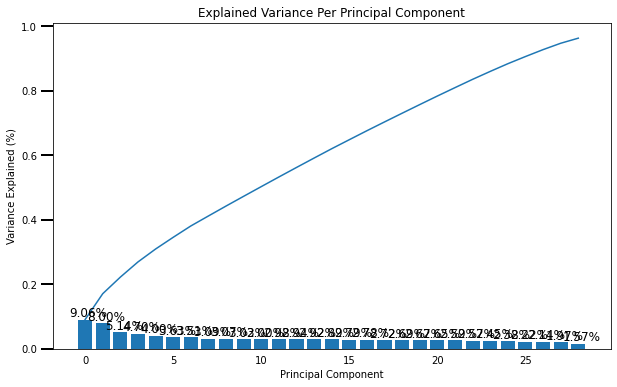

In [46]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
pca_plot(pca)

In [47]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

In [48]:
# using binary relevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

BR_classifier = BinaryRelevance(GaussianNB())
# train
BR_classifier.fit(X_train, y_train)
# predict
predictions = BR_classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

# Calculate multilabel confusion matrix
conf_matrix_multilabel = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrix_multilabel):
    print(f"Confusion Matrix for label {i}:")
    print(conf_matrix)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))


Accuracy =  0.7093992248062015
Confusion Matrix for label 0:
[[ 8906    64]
 [  250 11420]]
Confusion Matrix for label 1:
[[11604  4188]
 [   11  4837]]
Confusion Matrix for label 2:
[[14764  1754]
 [    0  4122]]
--- Run time: 0.01 mins ---


In [49]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

CC_classifier = ClassifierChain(GaussianNB())

# train
CC_classifier.fit(X_train, y_train)

# predict
predictions = CC_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

# Calculate multilabel confusion matrix
conf_matrix_multilabel = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrix_multilabel):
    print(f"Confusion Matrix for label {i}:")
    print(conf_matrix)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.8164728682170542
Confusion Matrix for label 0:
[[ 8906    64]
 [  250 11420]]
Confusion Matrix for label 1:
[[12111  3681]
 [   74  4774]]
Confusion Matrix for label 2:
[[16518     0]
 [ 3464   658]]
--- Run time: 0.02 mins ---


In [50]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

LP_classifier = LabelPowerset(GaussianNB())

# train
LP_classifier.fit(X_train, y_train)

# predict
predictions = LP_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

# Calculate multilabel confusion matrix
conf_matrix_multilabel = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrix_multilabel):
    print(f"Confusion Matrix for label {i}:")
    print(conf_matrix)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.8819767441860465
Confusion Matrix for label 0:
[[ 8961     9]
 [  724 10946]]
Confusion Matrix for label 1:
[[15119   673]
 [ 1712  3136]]
Confusion Matrix for label 2:
[[14764  1754]
 [    0  4122]]
--- Run time: 0.08 mins ---


In [51]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=1)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn = 1
predictions = MLKNN_classifier.predict(X_test_pca)

#print(predictions)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

# Calculate multilabel confusion matrix
conf_matrix_multilabel = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrix_multilabel):
    print(f"Confusion Matrix for label {i}:")
    print(conf_matrix)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Accuracy =  1.0
Confusion Matrix for label 0:
[[ 8970     0]
 [    0 11670]]
Confusion Matrix for label 1:
[[15792     0]
 [    0  4848]]
Confusion Matrix for label 2:
[[16518     0]
 [    0  4122]]
--- Run time: 1.23 mins ---
